# Just-in-time Compilation with [Numba](http://numba.pydata.org/) 

## Numba is a JIT compiler which translates Python code in native machine language

* Using special decorators on Python functions Numba compiles them on the fly to machine code using LLVM
* Numba is compatible with Numpy arrays which are the basis of many scientific packages in Python
* It enables parallelization of machine code so that all the CPU cores are used

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import numba

## Using `numba.jit`

Numba offers `jit` which can used to decorate Python functions.

In [2]:
def is_prime(n):
    if n <= 1:
        raise ArithmeticError('"%s" <= 1' % n)
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False
            
    return True

In [3]:
n = np.random.randint(2, 10000000, dtype=np.int64) # Get a random integer between 2 and 10000000
print(n, is_prime(n))

9166285 False


In [4]:
#is_prime(1)

In [5]:
@numba.jit
def is_prime_jitted(n):
    if n <= 1:
        raise ArithmeticError('"%s" <= 1' % n)
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False

    return True

In [6]:
numbers = np.random.randint(2, 100000, dtype=np.int64, size=10000)
%time p1 = [is_prime(n) for n in numbers]
%time p2 = [is_prime_jitted(n) for n in numbers]

CPU times: user 99.8 ms, sys: 58 µs, total: 99.9 ms
Wall time: 99.4 ms


<ipython-input-5-5628b590bd13>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Internal error in pre-inference rewriting pass encountered during compilation of function "is_prime_jitted" due to: Constant inference not possible for: $const12.1 % n

File "<ipython-input-5-5628b590bd13>", line 4:
def is_prime_jitted(n):
    <source elided>
    if n <= 1:
        raise ArithmeticError('"%s" <= 1' % n)
        ^

  @numba.jit


CPU times: user 861 ms, sys: 463 ms, total: 1.32 s
Wall time: 577 ms


/home/teojgo/.local/lib/python3.9/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "is_prime_jitted" was compiled in object mode without forceobj=True.

File "<ipython-input-5-5628b590bd13>", line 2:
@numba.jit
def is_prime_jitted(n):
^

  warnings.warn(errors.NumbaWarning(warn_msg,
/home/teojgo/.local/lib/python3.9/site-packages/numba/core/object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "<ipython-input-5-5628b590bd13>", line 2:
@numba.jit
def is_prime_jitted(n):
^

  warnings.warn(errors.NumbaDeprecationWarning(msg,


## Using `numba.jit` with `nopython=True`

In [7]:
@numba.jit(nopython=True)
def is_prime_njitted(n):
    if n <= 1:
        raise ArithmeticError('"%s" <= 1' % n)
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False

    return True

In [8]:
numbers = np.random.randint(2, 100000, dtype=np.int64, size=1000)
%time p1 = [is_prime_jitted(n) for n in numbers]
%time p2 = [is_prime_njitted(n) for n in numbers]

CPU times: user 9.06 ms, sys: 4.55 ms, total: 13.6 ms
Wall time: 13.5 ms


ConstantInferenceError: Failed in nopython mode pipeline (step: nopython rewrites)
Constant inference not possible for: $const12.1 % n

File "<ipython-input-7-1ec266a8e1b1>", line 4:
def is_prime_njitted(n):
    <source elided>
    if n <= 1:
        raise ArithmeticError('"%s" <= 1' % n)
        ^


## Using ` @numba.jit(nopython=True)` is equivalent to using ` @numba.njit`

In [9]:
@numba.njit
def is_prime_njitted(n):
    if n <= 1:
        raise ArithmeticError('n <= 1')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False

    return True

In [10]:
numbers = np.random.randint(2, 100000, dtype=np.int64, size=1000)
%time p = [is_prime_jitted(n) for n in numbers]
%time p = [is_prime_njitted(n) for n in numbers]

CPU times: user 11.9 ms, sys: 0 ns, total: 11.9 ms
Wall time: 11.9 ms
CPU times: user 74.7 ms, sys: 5.06 ms, total: 79.7 ms
Wall time: 88.7 ms


## Use `cache=True` to cache the compiled function

In [11]:
import math
from numba import njit

@njit(cache=True)
def is_prime_njitted_cached(n):
    if n <= 1:
        raise ArithmeticError('n <= 1')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False

    return True

In [12]:
numbers = np.random.randint(2, 100000, dtype=np.int64, size=1000)
%time p = [is_prime_njitted(n) for n in numbers]
%time p = [is_prime_njitted_cached(n) for n in numbers]

CPU times: user 916 µs, sys: 0 ns, total: 916 µs
Wall time: 922 µs
CPU times: user 80.8 ms, sys: 8.15 ms, total: 89 ms
Wall time: 90.3 ms


## Vector Triad Benchmark Python vs Numpy vs Numba

In [13]:
from timeit import default_timer as timer

def vecTriad(a, b, c, d):
    for j in range(a.shape[0]):
        a[j] = b[j] + c[j] * d[j]
              
def vecTriadNumpy(a, b, c, d):
    a[:] = b + c * d

@numba.njit()
def vecTriadNumba(a, b, c, d):
    for j in range(a.shape[0]):
        a[j] = b[j] + c[j] * d[j]

        
# Initialize Vectors
n = 10000 # Vector size
r = 100 # Iterations
a = np.zeros(n, dtype=np.float64)
b = np.empty_like(a)
b[:] = 1.0
c = np.empty_like(a)
c[:] = 1.0
d = np.empty_like(a)
d[:] = 1.0


# Python version
start = timer()

for i in range(r):
    vecTriad(a, b, c, d)
        
end = timer()
mflops = 2.0 * r * n / ((end - start) * 1.0e6) 
print(f'Python: Mflops/sec: {mflops}')


# Numpy version
start = timer()

for i in range(r):
    vecTriadNumpy(a, b, c, d)
        
end = timer()
mflops = 2.0 * r * n / ((end - start) * 1.0e6) 
print(f'Numpy: Mflops/sec: {mflops}')


# Numba version
vecTriadNumba(a, b, c, d) # Run once to avoid measuring the compilation overhead

start = timer()

for i in range(r):
    vecTriadNumba(a, b, c, d)
        
end = timer()
mflops = 2.0 * r * n / ((end - start) * 1.0e6) 
print(f'Numba: Mflops/sec: {mflops}')

Python: Mflops/sec: 4.054391116396938
Numpy: Mflops/sec: 1440.7789426876857
Numba: Mflops/sec: 3981.287948188027


## Eager compilation using function signatures

In [14]:
import math
from numba import njit

@njit(['boolean(int64)', 'boolean(int32)'])
def is_prime_njitted_eager(n):
    if n <= 1:
        raise ArithmeticError('n <= 1')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False

    return True

In [15]:
numbers = np.random.randint(2, 1000000, dtype=np.int64, size=1000)

# Run twice aft
%time p1 = [is_prime_njitted_eager(n) for n in numbers]
%time p2 = [is_prime_njitted_eager(n) for n in numbers]

CPU times: user 450 µs, sys: 0 ns, total: 450 µs
Wall time: 453 µs
CPU times: user 449 µs, sys: 0 ns, total: 449 µs
Wall time: 452 µs


In [16]:
p1 = [is_prime_njitted_eager(n) for n in numbers.astype(np.int32)]
#p2 = [is_prime_njitted_eager(n) for n in numbers.astype(np.float64)]

## Calculating and plotting the [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set)

In [17]:
X, Y = np.meshgrid(np.linspace(-2.0, 1, 1000), np.linspace(-1.0, 1.0, 1000))

def mandelbrot(X, Y, itermax):
    mandel = np.empty(shape=X.shape, dtype=np.int32)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            it = 0
            cx = X[i, j]
            cy = Y[i, j]
            x = 0.0
            y = 0.0
            while x * x + y * y < 4.0 and it < itermax:
                x, y = x * x - y * y + cx, 2.0 * x * y + cy
                it += 1
            mandel[i, j] = it
            
    return mandel

CPU times: user 26 s, sys: 43.9 ms, total: 26.1 s
Wall time: 26.1 s


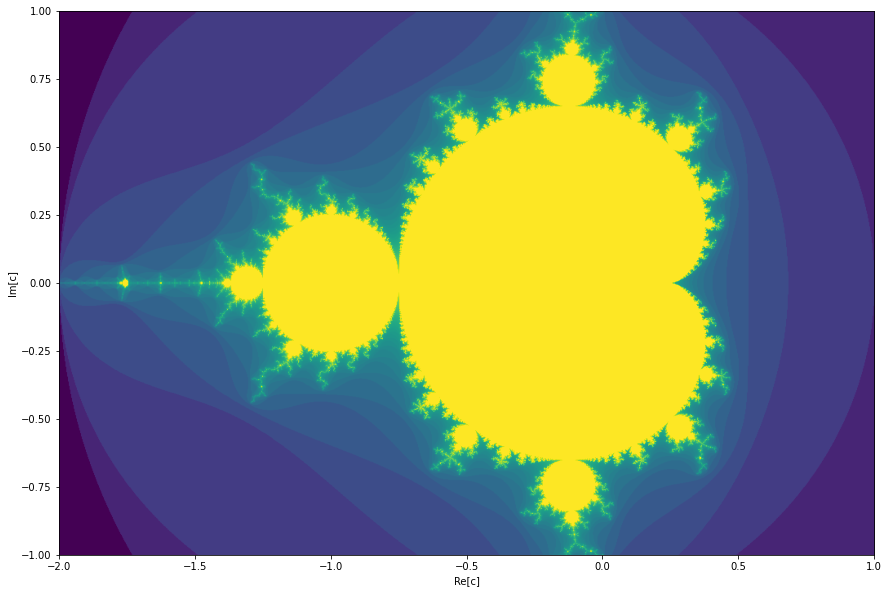

In [18]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

%time m = mandelbrot(X, Y, 100)
    
ax.imshow(np.log(1 + m), extent=[-2.0, 1, -1.0, 1.0]);
ax.set_aspect('equal')
ax.set_ylabel('Im[c]')
ax.set_xlabel('Re[c]');

In [19]:
@numba.njit(parallel=True)
def mandelbrot_jitted(X, Y, radius2, itermax):
    mandel = np.empty(shape=X.shape, dtype=np.int32)
    for i in numba.prange(X.shape[0]):
        for j in range(X.shape[1]):
            it = 0
            cx = X[i, j]
            cy = Y[i, j]
            x = cx
            y = cy
            while x * x + y * y < 4.0 and it < itermax:
                x, y = x * x - y * y + cx, 2.0 * x * y + cy
                it += 1
            mandel[i, j] = it
            
    return mandel

CPU times: user 517 ms, sys: 0 ns, total: 517 ms
Wall time: 367 ms


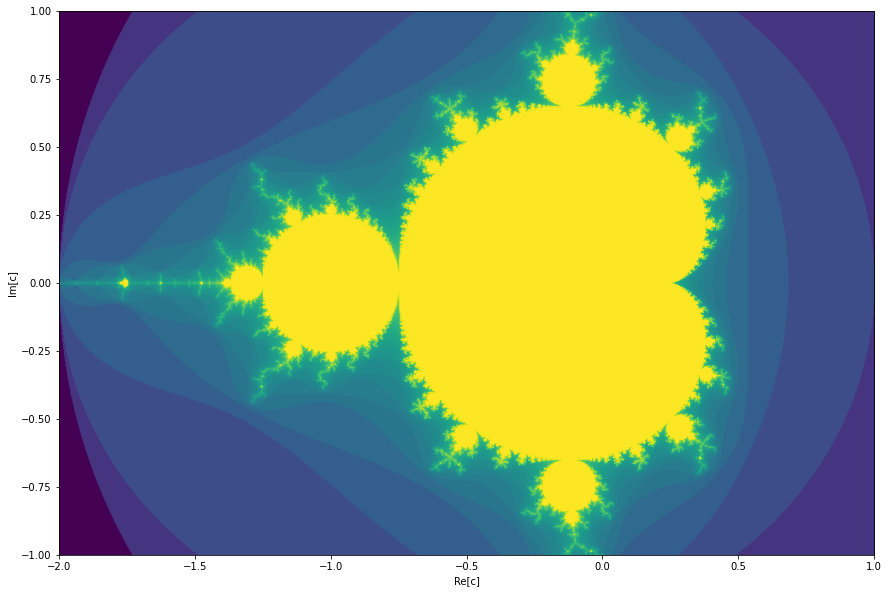

In [20]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)


%time m = mandelbrot_jitted(X, Y, 4.0, 100)
    
ax.imshow(np.log(1 + m), extent=[-2.0, 1, -1.0, 1.0]);
ax.set_aspect('equal')
ax.set_ylabel('Im[c]')
ax.set_xlabel('Re[c]');

### Getting parallelization information

In [21]:
mandelbrot_jitted.parallel_diagnostics(level=3)

 
 Parallel Accelerator Optimizing:  Function mandelbrot_jitted, <ipython-
input-19-238a75aae604> (1)  


Parallel loop listing for  Function mandelbrot_jitted, <ipython-input-19-238a75aae604> (1) 
---------------------------------------------------------------|loop #ID
@numba.njit(parallel=True)                                     | 
def mandelbrot_jitted(X, Y, radius2, itermax):                 | 
    mandel = np.empty(shape=X.shape, dtype=np.int32)           | 
    for i in numba.prange(X.shape[0]):-------------------------| #0
        for j in range(X.shape[1]):                            | 
            it = 0                                             | 
            cx = X[i, j]                                       | 
            cy = Y[i, j]                                       | 
            x = cx                                             | 
            y = cy                                             | 
            while x * x + y * y < 4.0 and it < itermax:        | 
 

## Creating `ufuncs` using `numba.vectorize`

In [22]:
from math import sin
from numba import float64, int64

def my_numpy_sin(a, b):
    return np.sin(a) + np.sin(b)

@np.vectorize
def my_sin(a, b):
    return sin(a) + sin(b)

@numba.vectorize([float64(float64, float64), int64(int64, int64)], target='parallel')
def my_sin_numba(a, b):
    return np.sin(a) + np.sin(b)

In [23]:
x = np.random.randint(0, 100, size=9000000)
y = np.random.randint(0, 100, size=9000000)

%time _ = my_numpy_sin(x, y)
%time _ = my_sin(x, y)
%time _ = my_sin_numba(x, y)

CPU times: user 293 ms, sys: 296 ms, total: 589 ms
Wall time: 591 ms
CPU times: user 2.14 s, sys: 229 ms, total: 2.37 s
Wall time: 2.37 s
CPU times: user 2.69 s, sys: 1.12 s, total: 3.82 s
Wall time: 377 ms


### Vectorize the testing of prime numbers 

In [24]:
@numba.vectorize('boolean(int64)')
def is_prime_v(n):
    if n <= 1:
        raise ArithmeticError(f'"0" <= 1')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False
            
    return True

In [25]:
numbers = np.random.randint(2, 10000000000, dtype=np.int64, size=100000)
%time p = is_prime_v(numbers)

CPU times: user 2.19 s, sys: 0 ns, total: 2.19 s
Wall time: 2.19 s


### Parallelize the vectorized function

In [26]:
@numba.vectorize(['boolean(int64)', 'boolean(int32)'],
                 target='parallel')
def is_prime_vp(n):
    if n <= 1:
        raise ArithmeticError('n <= 1')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt):
            if n % i == 0:
                return False
            
    return True

In [27]:
numbers = np.random.randint(2, 10000000000, dtype=np.int64, size=100000)
%time p1 = is_prime_v(numbers)
%time p2 = is_prime_vp(numbers)

CPU times: user 2.16 s, sys: 0 ns, total: 2.16 s
Wall time: 2.16 s
CPU times: user 3.29 s, sys: 242 µs, total: 3.29 s
Wall time: 289 ms


In [28]:
# Print the largest primes from to 1 and 10 millions
numbers = np.arange(1000000, 10000001, dtype=np.int32)
%time p1 = is_prime_vp(numbers)
primes = numbers[p1]

for n in primes[-10:]:
    print(n)

CPU times: user 9.85 s, sys: 1.73 ms, total: 9.85 s
Wall time: 836 ms
9999889
9999901
9999907
9999929
9999931
9999937
9999943
9999971
9999973
9999991
